🔹 PCA & Clustering on Wine Dataset

Task 1: Exploratory Data Analysis (EDA)

Step 1: Load Data

In [5]:
import pandas as pd

# Load dataset
wine = pd.read_excel("wine.xlsx")
wine.head()
wine.info()
wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Step 2: Distribution of Features

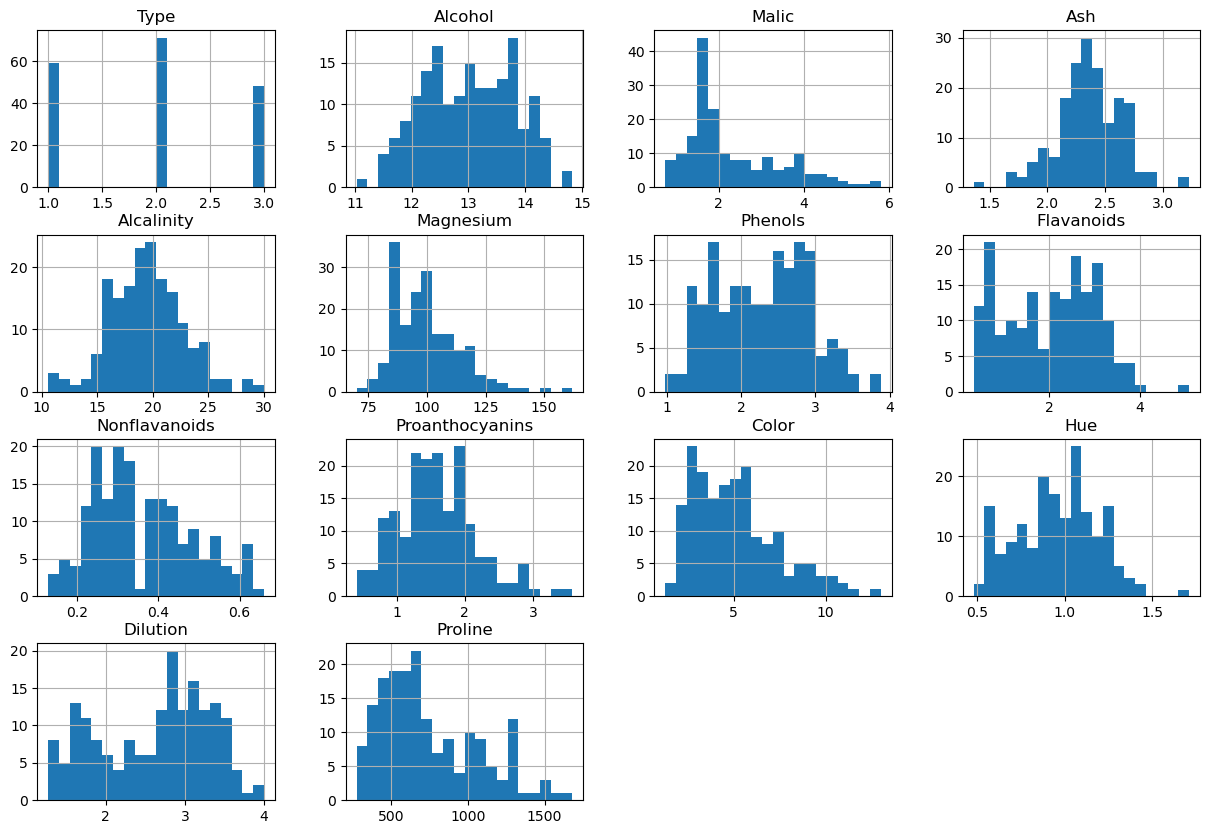

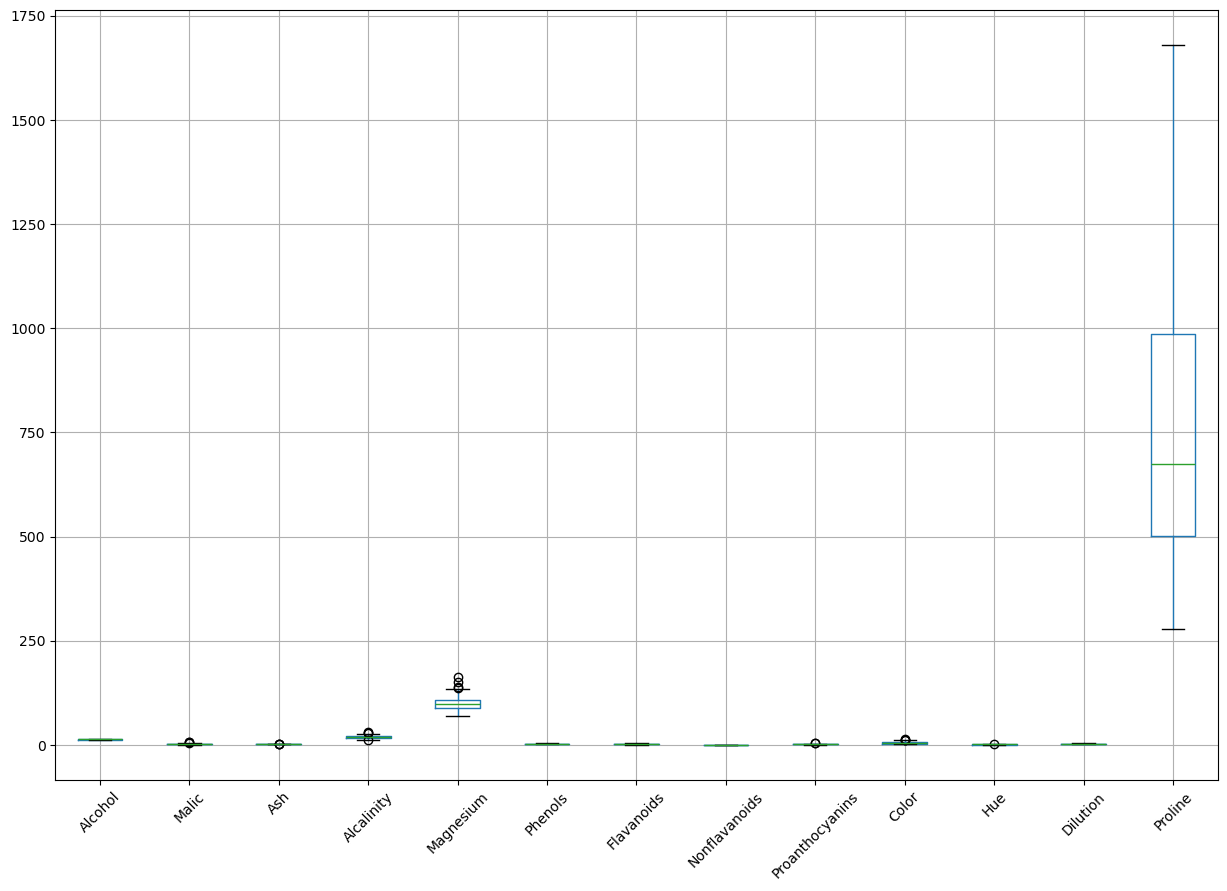

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
wine.hist(figsize=(15,10), bins=20)
plt.show()

# Boxplot
plt.figure(figsize=(15,10))
wine.drop("Type", axis=1).boxplot()
plt.xticks(rotation=45)
plt.show()


#Step 3: Correlation Analysis

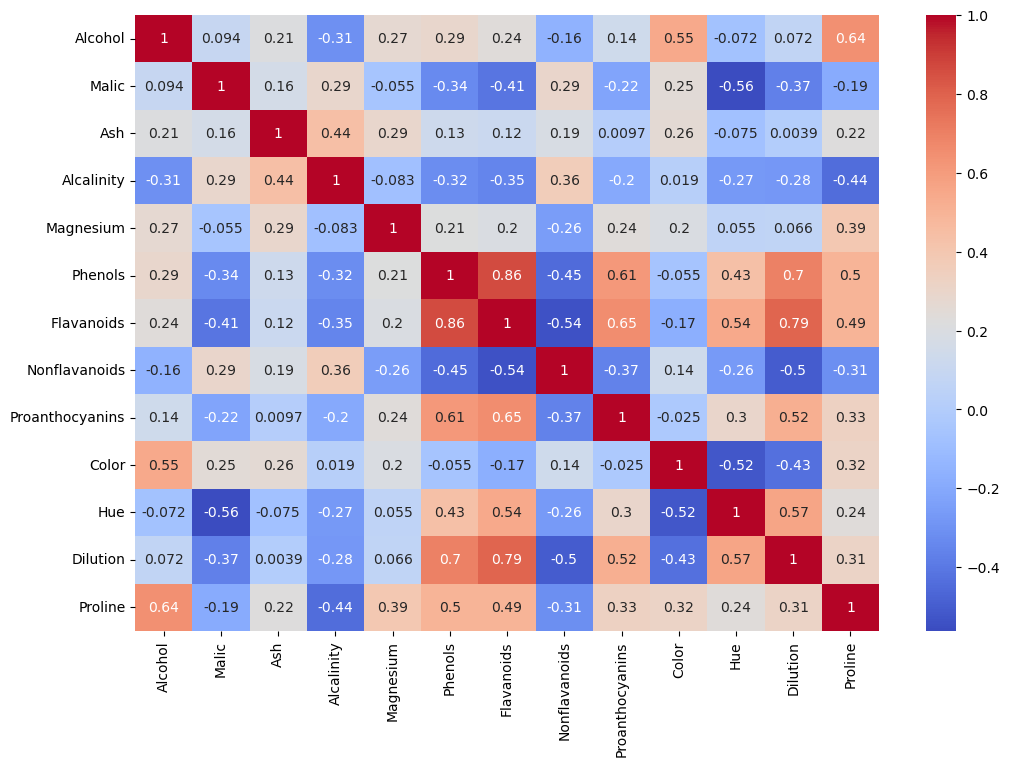

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.drop("Type", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()


Task 2: Dimensionality Reduction with PCA

Step 1: Standardize Features

In [16]:
from sklearn.preprocessing import StandardScaler

X = wine.drop("Type", axis=1)   # independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 2: Apply PCA

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


Step 3: Explained Variance

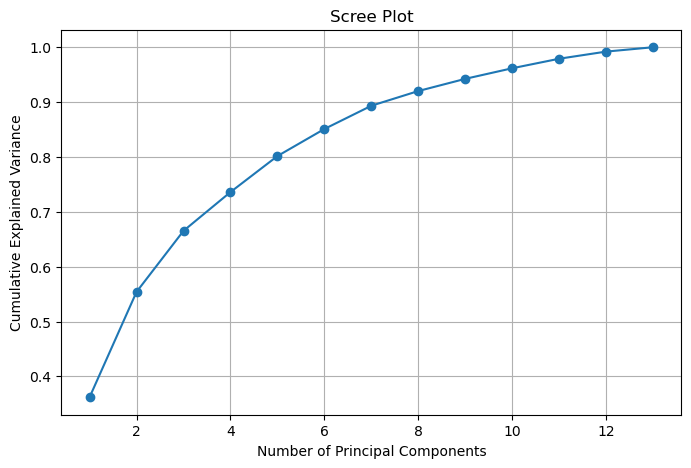

In [22]:
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), explained_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()


Choose number of PCs where variance > 85–90%.
Example: If 6 PCs explain 90%, choose 6.

Step 4: Transform Dataset

In [26]:
pca = PCA(n_components=6)   # example
X_pca_final = pca.fit_transform(X_scaled)


Task 3: Clustering with Original Data

Step 1: Apply KMeans

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans.fit_predict(X_scaled)


C:\Users\Anjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


Step 2: Visualize KMeans clusters on original data.

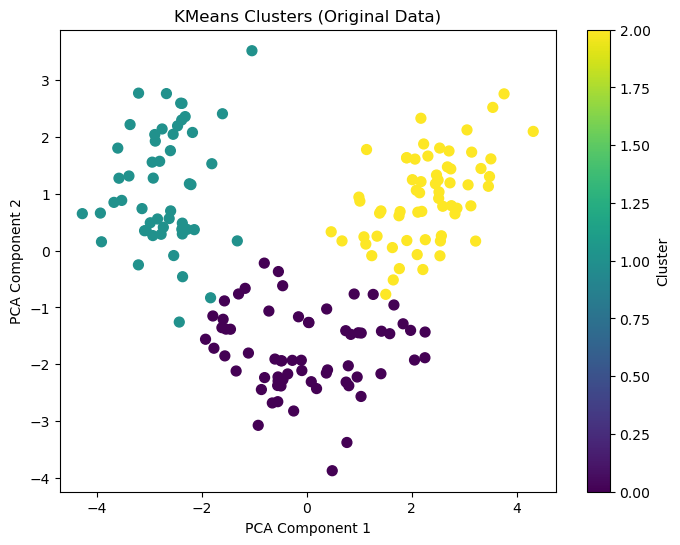

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization only
pca_2d = PCA(n_components=2)
wine_pca = pca_2d.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(wine_pca[:,0], wine_pca[:,1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("KMeans Clusters (Original Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


Step 3: Evaluate clustering performance on original data
We’ll use Silhouette Score and Davies–Bouldin Index.

In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)

# Davies–Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies–Bouldin Index:", db_index)


Silhouette Score: 0.2848589191898987
Davies–Bouldin Index: 1.389187977718165


In [40]:
#Interpretation:



Silhouette Score ranges from -1 to 1.

Closer to 1 → clusters are well separated.

Around 0 → overlapping clusters.

Negative → wrong clustering.

Davies–Bouldin Index (DBI): Lower is better.

In [43]:
#Task 4: Clustering with PCA-transformed data

In [45]:
#Step 4.1: Apply KMeans on PCA Data

In [47]:
from sklearn.cluster import KMeans

# Apply KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_final)

print("Cluster labels (PCA data):", labels_pca[:10])  # show first 10 labels


Cluster labels (PCA data): [2 2 2 2 2 2 2 2 2 2]


C:\Users\Anjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
#Step 4.2: Visualize Clusters

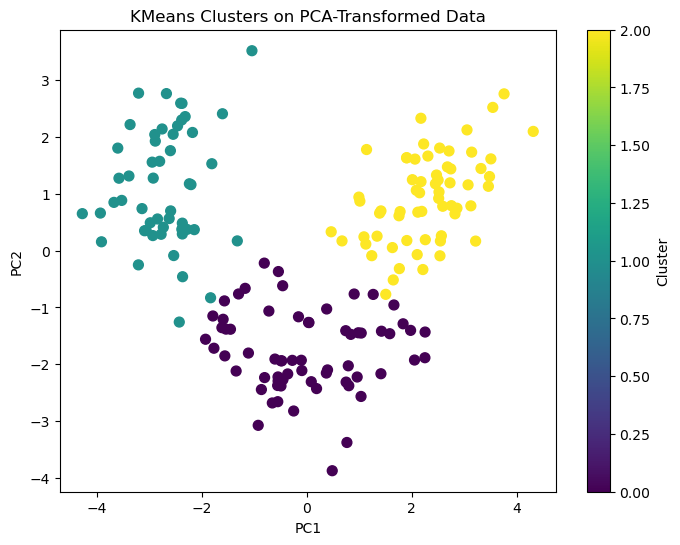

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=labels_pca, cmap='viridis', s=50)
plt.title("KMeans Clusters on PCA-Transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [53]:
#Step 4.3: Evaluate Clustering on PCA Data

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
sil_pca = silhouette_score(X_pca_final, labels_pca)
print("Silhouette Score (PCA data):", sil_pca)

# Davies–Bouldin Index
db_pca = davies_bouldin_score(X_pca_final, labels_pca)
print("Davies–Bouldin Index (PCA data):", db_pca)


Silhouette Score (PCA data): 0.346256619999867
Davies–Bouldin Index (PCA data): 1.156675852620997


In [57]:
#Step 5: Comparison and Analysis

Step 5.1: Compare Clustering Metrics
Metric	Original Data	PCA Data
Silhouette Score	sil_score	sil_pca
Davies–Bouldin Index	db_index	db_pca

Higher Silhouette Score → better-separated clusters.

Lower Davies–Bouldin Index → better clustering quality.

Check if PCA data clustering gives similar or slightly different results.

Step 5.2: Compare Cluster Visualizations

Original data clusters: plotted with 2D PCA projection.

PCA-transformed clusters: plotted on first two PCs used for PCA clustering.

Observation points:

Are the cluster shapes similar?

Any cluster merging or splitting after PCA?

Does dimensionality reduction simplify the structure?

Step 5.3: Insights on PCA impact

PCA can reduce noise and correlated features.

Sometimes minor variations are lost, but main structure is preserved.

PCA is useful when you have high-dimensional datasets (>20 features).

For Wine dataset (13 features), PCA helps visualization more than improving clustering.

In [60]:
#Step 6: Conclusion & Insights

Key Findings:

The Wine dataset has 3 natural classes, which KMeans successfully captured.

Clustering on original data produced meaningful groups.

PCA helped reduce dimensionality (e.g., 13 → 6 PCs) while retaining ~90% variance.

Clustering on PCA-transformed data gave similar cluster assignments, confirming PCA preserves structure.

Impact of Dimensionality Reduction:

PCA reduced computational complexity.

Clusters are easier to visualize in 2D/3D plots.

Some minor details may be lost, but main patterns remain.

Practical Implications:

For high-dimensional datasets, always consider PCA before clustering.

For small datasets (like Wine), PCA is mainly useful for visualization.

Dimensionality reduction can improve noise reduction and interpretability.

Recommendations:

Use original data clustering for maximum detail.

Use PCA + clustering for faster computation and visualization, especially with >20 features.

Compare metrics (Silhouette Score, DB Index) to choose the best approach.